## Task 7: Stock Market Prediction using Numerical and Textual Analysis

*Author: Pankaz Debnath*

*Intern of Data Science & Business Analytics*

*Program: Graduate Rotational Internship Program(GRIP)*

*Organization: The Sparks Foundation*

*Batch: GRIPAPRIL'22*

LinkedIn: https://www.linkedin.com/in/pankaz-debnath/

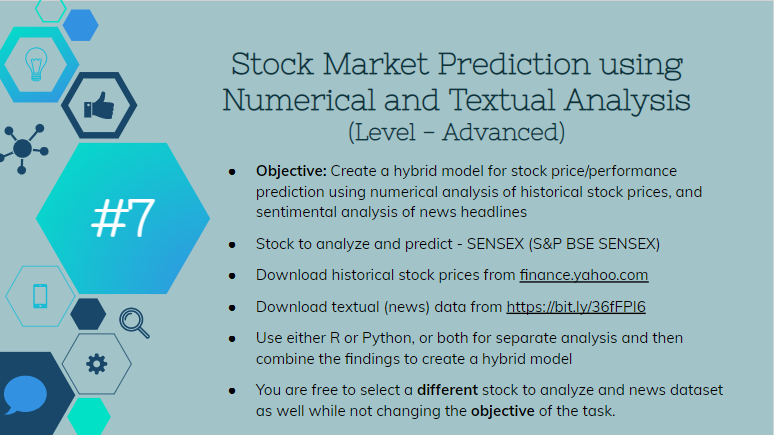

# 1 Importing Dependancies and Data

1.1 Mounting Google Drive

In [ ]:
# for mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1.2 Importing Dependencies

In [ ]:
# install nltk library if didn't previously. follow the code from this cell for texual analysis
# !pip install nltk
# import nltk
# nltk.download('vader_lexicon')

In [1]:
# Importing ibraries

# to get rid of the warnings
import warnings
warnings.filterwarnings('ignore')

import math             # to apply mathematical operations
import pandas as pd     # to analyze and manipulation of data
import numpy as np      # for array operations
import datetime as dt   # for maintaining date type values

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for bulding deep learning model
import tensorflow as tf
#from tensorflow import keras


#from keras.models import Sequential
#from keras.layers import Dense, LSTM, Dropout, Dense, Activation

# for analyzing textual data
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

# for preprocessing data and evaluating the model 
from sklearn import preprocessing, metrics
from sklearn.preprocessing import MinMaxScaler

1.2 Importing Data from Drive

In [2]:
#reading the datas from drive
price_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stock market prediction/MSFT.csv')
stock_news = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stock market prediction/india-news-headlines.csv')

In [4]:
# displaying stock price dataset
price_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061252,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063439,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064533,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062892,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061799,47894400


In [5]:
# displaying stock news headlines dataset
stock_news.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


##2 Feature Engineering

In [6]:
# checking the size of the dataset
len(price_data), len(stock_news)

(9100, 3650970)

In [7]:
# checking the NULL values in both dataset
price_data.isnull().sum(), stock_news.isnull().sum()

(Date         0
 Open         0
 High         0
 Low          0
 Close        0
 Adj Close    0
 Volume       0
 dtype: int64, publish_date         0
 headline_category    0
 headline_text        0
 dtype: int64)

2.1 Price Data

In [8]:
# displaying dataset for view to manipulate
price_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061252,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063439,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064533,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062892,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061799,47894400


In [9]:
# droping the duplicate values of dataset
price_data = price_data.drop_duplicates()

price_data['Date'] = pd.to_datetime(price_data['Date']).dt.normalize()

# filterning importent features
price_data = price_data.filter(['Date', 'Open', 'Close', 'High', 'Low', 'Volume'])

# replacing the index by Date values
price_data.set_index('Date', inplace=True)

# sorting data/index according to date
price_data = price_data.sort_index(ascending=True, axis=0)
price_data.head()

,Open,Close,High,Low,Volume
Date,,,,,
1986-03-13,0.088542,0.097222,0.101563,0.088542,1031788800
1986-03-14,0.097222,0.100694,0.102431,0.097222,308160000
1986-03-17,0.100694,0.102431,0.103299,0.100694,133171200
1986-03-18,0.102431,0.099826,0.103299,0.098958,67766400
1986-03-19,0.099826,0.098090,0.100694,0.097222,47894400


2.2 Stock datas news headlines

In [10]:
stock_news.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [11]:
# droping duplicates
stock_news = stock_news.drop_duplicates()

# converting 'publish_date' from 'string' to type 'datetime'
stock_news['publish_date'] = stock_news['publish_date'].astype(str)
stock_news['publish_date'] = stock_news['publish_date'].apply(lambda x: x[0:4]+'-'+x[4:6]+'-'+x[6:8])
stock_news['publish_date'] = pd.to_datetime(stock_news['publish_date']).dt.normalize()

# filtering the required columns to work with
stock_news = stock_news.filter(['publish_date', 'headline_text'])

# grouping the 'headline_text' according to 'publish_date'
stock_news = stock_news.groupby(['publish_date'])['headline_text'].apply(lambda x: ','.join(x)).reset_index()

# setting column 'publish_date' as index
stock_news.set_index('publish_date', inplace = True)

# sorting the news headlines according to the index 'publish_date'
stock_news = stock_news.sort_index(ascending=True, axis=0)

# display 'stock_news' dataset after the processes
stock_news.head()

,headline_text
publish_date,
2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2001-01-03,"Powerless north India gropes in the dark,Think..."
2001-01-04,The string that pulled Stephen Hawking to Indi...
2001-01-05,Light combat craft takes India into club class...
2001-01-06,Light combat craft takes India into club class...


2.3 Combined 'stock_data'

In [12]:
# Combining 'price_data' and 'stock_news'
stock_data = pd.concat([price_data, stock_news], axis=1)

#display the combined 'stock_data'
stock_data.head()

,Open,Close,High,Low,Volume,headline_text
1986-03-13,0.088542,0.097222,0.101563,0.088542,1.031789e+09,NaN
1986-03-14,0.097222,0.100694,0.102431,0.097222,3.081600e+08,NaN
1986-03-17,0.100694,0.102431,0.103299,0.100694,1.331712e+08,NaN
1986-03-18,0.102431,0.099826,0.103299,0.098958,6.776640e+07,NaN
1986-03-19,0.099826,0.098090,0.100694,0.097222,4.789440e+07,NaN


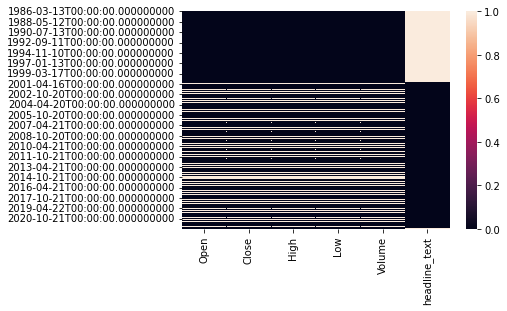

In [13]:
# checking for NULL values by visualization
ax = sns.heatmap(stock_data.isnull())

In [14]:
# droping the null values
stock_data.dropna(axis = 0, inplace = True)
stock_data.head()

,Open,Close,High,Low,Volume,headline_text
2001-01-02,22.06250,21.68750,22.5000,21.43750,82413200.0,Status quo will not be disturbed at Ayodhya; s...
2001-01-03,21.59375,23.96875,24.4375,21.56250,135962200.0,"Powerless north India gropes in the dark,Think..."
2001-01-04,23.90625,24.21875,25.2500,23.43750,112397000.0,The string that pulled Stephen Hawking to Indi...
2001-01-05,24.25000,24.56250,24.9375,23.78125,93414600.0,Light combat craft takes India into club class...
2001-01-08,24.46875,24.46875,24.8750,23.34375,79817600.0,"Sangh Parivar; Babri panel up the ante,Frontru..."


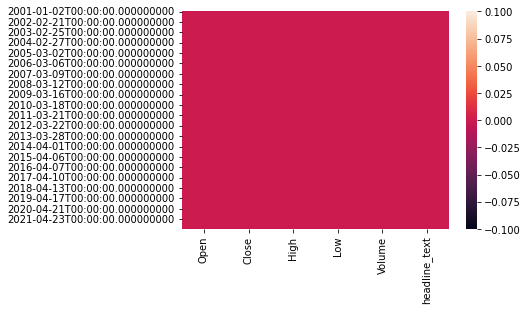

In [15]:
# again visualize according to NULL values for understanding
ax = sns.heatmap(stock_data.isnull())

In [16]:
stock_data.shape

(5318, 6)

2.4 Calculeting Sentiment scores from 'headline_text'

In [17]:
# adding empty columns to dataset for storing the sentiment scores
stock_data['compound'] = ''
stock_data['positive'] = ''
stock_data['negative'] = ''
stock_data['neutral'] = ''
stock_data.head()


,Open,Close,High,Low,Volume,headline_text,compound,positive,negative,neutral
2001-01-02,22.06250,21.68750,22.5000,21.43750,82413200.0,Status quo will not be disturbed at Ayodhya; s...,,,,
2001-01-03,21.59375,23.96875,24.4375,21.56250,135962200.0,"Powerless north India gropes in the dark,Think...",,,,
2001-01-04,23.90625,24.21875,25.2500,23.43750,112397000.0,The string that pulled Stephen Hawking to Indi...,,,,
2001-01-05,24.25000,24.56250,24.9375,23.78125,93414600.0,Light combat craft takes India into club class...,,,,
2001-01-08,24.46875,24.46875,24.8750,23.34375,79817600.0,"Sangh Parivar; Babri panel up the ante,Frontru...",,,,


In [20]:
# importing required libraries for analyze the sentiments
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

# instantiating the analyzer
sia = SentimentIntensityAnalyzer()

#calculating the scores by sentiment analyzer
stock_data['compound'] = stock_data['headline_text'].apply(lambda x: sia.polarity_scores(x)['compound'])
stock_data['positive'] = stock_data['headline_text'].apply(lambda x: sia.polarity_scores(x)['pos'])
stock_data['negative'] = stock_data['headline_text'].apply(lambda x: sia.polarity_scores(x)['neg'])
stock_data['neutral'] = stock_data['headline_text'].apply(lambda x: sia.polarity_scores(x)['neu'])

# displaying the 'stock_data'
stock_data.head()

,Open,Close,High,Low,Volume,headline_text,compound,positive,negative,neutral
2001-01-02,22.06250,21.68750,22.5000,21.43750,82413200.0,Status quo will not be disturbed at Ayodhya; s...,-0.9621,0.064,0.119,0.817
2001-01-03,21.59375,23.96875,24.4375,21.56250,135962200.0,"Powerless north India gropes in the dark,Think...",0.6322,0.098,0.084,0.817
2001-01-04,23.90625,24.21875,25.2500,23.43750,112397000.0,The string that pulled Stephen Hawking to Indi...,0.6648,0.080,0.077,0.843
2001-01-05,24.25000,24.56250,24.9375,23.78125,93414600.0,Light combat craft takes India into club class...,0.9032,0.149,0.105,0.746
2001-01-08,24.46875,24.46875,24.8750,23.34375,79817600.0,"Sangh Parivar; Babri panel up the ante,Frontru...",-0.9638,0.026,0.119,0.855


# 3 Finalize and writing stock_data to drive

In [ ]:
# drop the 'headline_text' column which sentiment score has been generated
stock_data.drop(['headline_text'])

In [23]:
# rearanging all columns of 'stock_data'
stock_data = stock_data[['Close', 'compound', 'negative', 'neutral', 'positive', 'Open', 'High', 'Low', 'Volume']]

# displaying the data
stock_data.head()

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
2001-01-02,21.68750,-0.9621,0.119,0.817,0.064,22.06250,22.5000,21.43750,82413200.0
2001-01-03,23.96875,0.6322,0.084,0.817,0.098,21.59375,24.4375,21.56250,135962200.0
2001-01-04,24.21875,0.6648,0.077,0.843,0.080,23.90625,25.2500,23.43750,112397000.0
2001-01-05,24.56250,0.9032,0.105,0.746,0.149,24.25000,24.9375,23.78125,93414600.0
2001-01-08,24.46875,-0.9638,0.119,0.855,0.026,24.46875,24.8750,23.34375,79817600.0


In [24]:
# writing the prepared data to drive to avoid the procedure done before
stock_data.to_csv('microsoft_stock_data.csv')

# 4 Reading 'microsoft_stock_data' Feature Engineering on stock_data

In [2]:
# reading the 'tesla_stock_data' into pandas dataframe from drive
stock_data = pd.read_csv('microsoft_stock_data.csv', index_col = False)

# naming the index column
stock_data.rename(columns={'Unnamed: 0':'Date'}, inplace = True)

# setting the 'Date' as the index column
stock_data.set_index('Date', inplace=True)

# displaying the stock_data
stock_data.head()

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,,
2001-01-02,21.68750,-0.9621,0.119,0.817,0.064,22.06250,22.5000,21.43750,82413200.0
2001-01-03,23.96875,0.6322,0.084,0.817,0.098,21.59375,24.4375,21.56250,135962200.0
2001-01-04,24.21875,0.6648,0.077,0.843,0.080,23.90625,25.2500,23.43750,112397000.0
2001-01-05,24.56250,0.9032,0.105,0.746,0.149,24.25000,24.9375,23.78125,93414600.0
2001-01-08,24.46875,-0.9638,0.119,0.855,0.026,24.46875,24.8750,23.34375,79817600.0


In [3]:
# checking the shape (i.e. number rows and columns) of the dataset
stock_data.shape

(5318, 9)

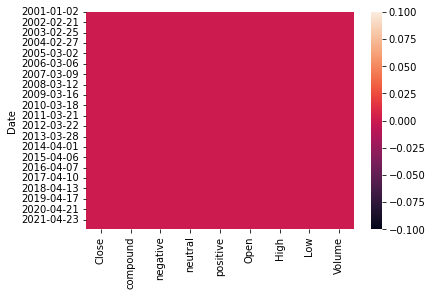

In [4]:
# checking for NULL values by heatmap
ax = sns.heatmap(stock_data.isnull())

In [5]:
# generating basic statistical values for understanding
stock_data.describe(include='all')

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
count,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5.318000e+03
mean,63.780231,-0.878114,0.125495,0.789377,0.085131,63.759750,64.393428,63.112735,5.161554e+07
std,69.396760,0.441368,0.023898,0.032594,0.020476,69.376285,70.041739,68.651641,2.999304e+07
min,15.150000,-1.000000,0.000000,0.000000,0.000000,15.200000,15.620000,14.870000,7.425600e+06
25%,26.740000,-0.999800,0.112000,0.769000,0.074000,26.750000,27.010000,26.480000,2.975395e+07
50%,30.540001,-0.999200,0.127000,0.786000,0.085000,30.505000,30.799999,30.225000,4.696600e+07
75%,62.299999,-0.995100,0.140000,0.807000,0.095000,62.495000,62.802500,62.037500,6.508085e+07
max,343.109985,1.000000,0.444000,1.000000,0.608000,344.619995,349.670013,342.200012,5.910522e+08


In [6]:
# displaying the basic informations of dataset
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5318 entries, 2001-01-02 to 2022-03-31
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Close     5318 non-null   float64
 1   compound  5318 non-null   float64
 2   negative  5318 non-null   float64
 3   neutral   5318 non-null   float64
 4   positive  5318 non-null   float64
 5   Open      5318 non-null   float64
 6   High      5318 non-null   float64
 7   Low       5318 non-null   float64
 8   Volume    5318 non-null   float64
dtypes: float64(9)
memory usage: 415.5+ KB


## 5 Explanetory Data Analysis(EDA) for the dataset

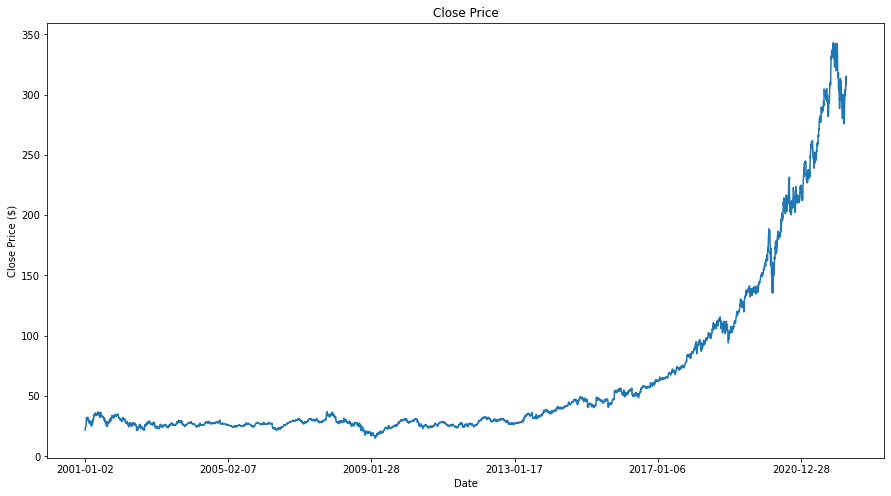

In [7]:
# defining figure size for plot
plt.figure(figsize=(15, 8))

# plotting 'close' price
stock_data['Close'].plot()

# defining title and labels of the plot
plt.title("Close Price")
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.show()

In [8]:
# calculation the rolling mean for 7 days
stock_data.rolling(7).mean().head(20)

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,,
2001-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-10,24.464286,-0.179071,0.121714,0.810429,0.067571,23.825893,25.031250,23.401786,1.013143e+08
2001-01-23,25.691964,0.091157,0.109857,0.818571,0.071286,24.941964,26.169643,24.549107,9.958317e+07
2001-01-24,26.763393,-0.128286,0.111571,0.825286,0.063000,26.214286,27.209821,25.808036,9.593929e+07


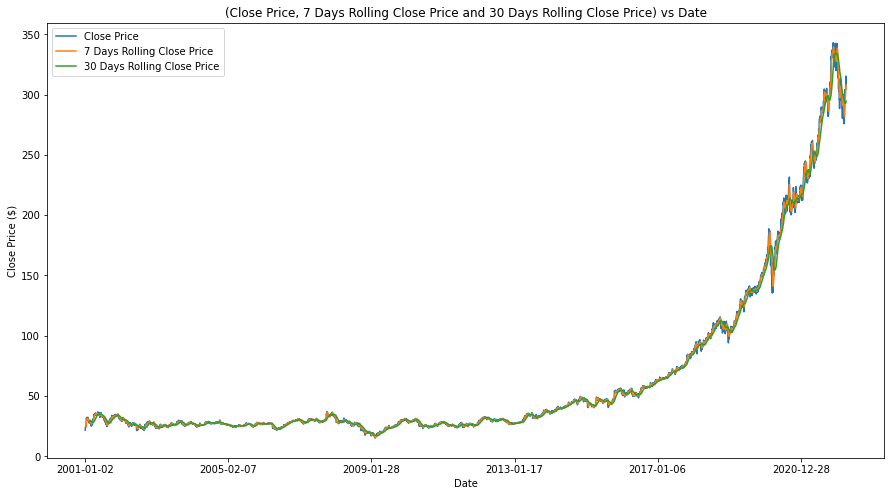

In [9]:
# defining figure size for plot
plt.figure(figsize=(15, 8))

#plotting the close price, a 7 days rolling mean and a 30 days rolling mean
stock_data['Close'].plot()                              # for Close price
stock_data.rolling(window=7).mean()['Close'].plot()     # for 7 days rolling mean of Close price
stock_data.rolling(window=30).mean()['Close'].plot()    # for 30 days rolling mean of Close price

# defining title and labels of the plot
plt.title("(Close Price, 7 Days Rolling Close Price and 30 Days Rolling Close Price) vs Date")
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.legend(["Close Price", "7 Days Rolling Close Price", "30 Days Rolling Close Price"])
plt.show()

# 6 Data Preparation for Creating Model

In [10]:
# calculating 'data_to_use'
percentage_of_data = 1.0
data_to_use = int(percentage_of_data*(len(stock_data)-1))

# using .8 of data for training and .2 for testing
train_end = int(data_to_use*0.9)
total_data = len(stock_data)
start = total_data - data_to_use

# printing number of records in the training and test datasets
print("Training Data records number:", train_end)
print("Test Data Records number:", total_data - train_end)

Training Data records number: 4785
Test Data Records number: 533


In [11]:
# predicting the next step
steps_to_predict = 1

# capturing data to be used for each column
close_price = stock_data.iloc[start:total_data,0]   #close
compound = stock_data.iloc[start:total_data,1]      #compound
negative = stock_data.iloc[start:total_data,2]      #negative
neutral = stock_data.iloc[start:total_data,3]       #neutral
positive = stock_data.iloc[start:total_data,4]      #positive
open_price = stock_data.iloc[start:total_data,5]    #open_price
high = stock_data.iloc[start:total_data,6]          #high_price
low = stock_data.iloc[start:total_data,7]           #low_price
volume = stock_data.iloc[start:total_data,8]        #volume_of stock

# printing close price
print("Close Price:")
close_price

Close Price:


Date
2001-01-03     23.968750
2001-01-04     24.218750
2001-01-05     24.562500
2001-01-08     24.468750
2001-01-09     25.906250
                 ...    
2022-03-25    303.679993
2022-03-28    310.700012
2022-03-29    315.410004
2022-03-30    313.859985
2022-03-31    308.309998
Name: Close, Length: 5317, dtype: float64

In [12]:
# shifting 'close' to next day close
close_price_shifted = close_price.shift(-1) 

# shifting the 'compound' to next day compound
compound_shifted = compound.shift(-1) 

# concatenating the captured training data into a dataframe
data = pd.concat([close_price, close_price_shifted, compound, compound_shifted, volume, open_price, high, low], axis=1)

# setting column names of the revised stock data
data.columns = ['close_price', 'shifted_close_price', 'compound', 'shifted_compound','volume', 'open_price', 'high', 'low']

# dropping NULL values
data = data.dropna()    
data.head()

,close_price,shifted_close_price,compound,shifted_compound,volume,open_price,high,low
Date,,,,,,,,
2001-01-03,23.96875,24.21875,0.6322,0.6648,135962200.0,21.59375,24.4375,21.56250
2001-01-04,24.21875,24.56250,0.6648,0.9032,112397000.0,23.90625,25.2500,23.43750
2001-01-05,24.56250,24.46875,0.9032,-0.9638,93414600.0,24.25000,24.9375,23.78125
2001-01-08,24.46875,25.90625,-0.9638,-0.9559,79817600.0,24.46875,24.8750,23.34375
2001-01-09,25.90625,26.43750,-0.9559,-0.5719,114965400.0,25.00000,26.3125,24.87500


# 7 Defining the Target Variable and Feature Dataset

In [13]:
# defining shifted_close_price as the target veriable
y = data['shifted_close_price']
y

Date
2001-01-03     24.218750
2001-01-04     24.562500
2001-01-05     24.468750
2001-01-08     25.906250
2001-01-09     26.437500
                 ...    
2022-03-24    303.679993
2022-03-25    310.700012
2022-03-28    315.410004
2022-03-29    313.859985
2022-03-30    308.309998
Name: shifted_close_price, Length: 5316, dtype: float64

In [14]:
# defining the features dataset for prediction  
cols = ['close_price', 'compound', 'shifted_compound', 'volume', 'open_price', 'high', 'low']
X = data[cols]
X

,close_price,compound,shifted_compound,volume,open_price,high,low
Date,,,,,,,
2001-01-03,23.968750,0.6322,0.6648,135962200.0,21.593750,24.437500,21.562500
2001-01-04,24.218750,0.6648,0.9032,112397000.0,23.906250,25.250000,23.437500
2001-01-05,24.562500,0.9032,-0.9638,93414600.0,24.250000,24.937500,23.781250
2001-01-08,24.468750,-0.9638,-0.9559,79817600.0,24.468750,24.875000,23.343750
2001-01-09,25.906250,-0.9559,-0.5719,114965400.0,25.000000,26.312500,24.875000
...,...,...,...,...,...,...,...
2022-03-24,304.100006,-0.9999,-0.9999,24484500.0,299.140015,304.200012,298.320007
2022-03-25,303.679993,-0.9999,-0.9999,22566500.0,305.230011,305.500000,299.290009
2022-03-28,310.700012,-0.9999,-0.9998,29578200.0,304.329987,310.799988,304.329987


7.1 Scaling the target variable and the feature dataset

In [15]:
# scaling the training features dataset
scaler_X = preprocessing.MinMaxScaler (feature_range=(-1, 1))
X = np.array(X).reshape((len(X) ,len(cols)))
X = scaler_X.fit_transform(X)

# scaling the target variable
scaler_y = preprocessing.MinMaxScaler (feature_range=(-1, 1))
y = np.array(y).reshape ((len( y), 1))
y = scaler_y.fit_transform (y)

# displaying the scaled training features dataset and the target variable
X, y

(array([[-0.94622057,  0.6322    ,  0.6648    , ..., -0.96118177,
         -0.9472085 , -0.95910855],
        [-0.944696  ,  0.6648    ,  0.9032    , ..., -0.94714195,
         -0.94234396, -0.94765222],
        [-0.9425997 ,  0.9032    , -0.9638    , ..., -0.94505494,
         -0.94421494, -0.94555189],
        ...,
        [ 0.8023541 , -0.9999    , -0.9998    , ...,  0.75538821,
          0.76728021,  0.76861257],
        [ 0.83107707, -0.9998    , -0.9999    , ...,  0.81355114,
          0.7973357 ,  0.79745197],
        [ 0.82162458, -0.9999    , -0.9999    , ...,  0.81264049,
          0.79811406,  0.81291037]]), array([[-0.944696  ],
        [-0.9425997 ],
        [-0.94317142],
        ...,
        [ 0.83107707],
        [ 0.82162458],
        [ 0.78777907]]))

7.2 Spliting the dataset into Train and Test dataset

In [16]:
'''# importing train_test_split for spliting the dataset into train and test data
from sklearn.model_selection import train_test_split

# preparing training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = None)'''

# preparing training and test dataset
X_train = X[0 : train_end]
X_test = X[train_end+1 : len(X)]    
y_train = y[0 : train_end] 
y_test = y[train_end+1 : len(y)]

# printing the shape of the training and the test datasets
print('Number of rows and columns in the Training set X:', X_train.shape, 'and y:', y_train.shape)
print('Number of rows and columns in the Test set X:', X_test.shape, 'and y:', y_test.shape)

Number of rows and columns in the Training set X: (4785, 7) and y: (4785, 1)
Number of rows and columns in the Test set X: (530, 7) and y: (530, 1)


7.3 Reshaping the Feature dataset

In [17]:
# reshaping the feature dataset for feeding into the model
X_train = X_train.reshape(X_train.shape + (1,)) 
X_test = X_test.reshape(X_test.shape + (1,))

# printing the re-shaped feature dataset
print('Shape of Training set X:', X_train.shape)
print('Shape of Test set X:', X_test.shape)

Shape of Training set X: (4785, 7, 1)
Shape of Test set X: (530, 7, 1)


# 8 Stock Data Modelling

In [18]:
# setting the seed to achieve consistent and less random predictions at each execution
#np.random.seed(2016)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


# setting the model architecture
model=Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(len(cols),1)))
model.add(LSTM(128,return_sequences=True))
model.add(LSTM(128))
model.add(Dense(1))

# printing the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 128)            66560     
                                                                 
 lstm_1 (LSTM)               (None, 7, 128)            131584    
                                                                 
 lstm_2 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 329,857
Trainable params: 329,857
Non-trainable params: 0
_________________________________________________________________


In [19]:
# model compilation
model.compile(loss='mean_squared_error', optimizer='adam')

# fitting the model with using the training dataset
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size = 64, verbose = 1)

Epoch 1/100
75/75 [==============================] - 12s 56ms/step - loss: 0.0743 - val_loss: 0.9487
Epoch 2/100
75/75 [==============================] - 3s 40ms/step - loss: 0.0304 - val_loss: 0.9814
Epoch 3/100
75/75 [==============================] - 3s 42ms/step - loss: 0.0286 - val_loss: 0.9151
Epoch 4/100
75/75 [==============================] - 3s 40ms/step - loss: 0.0198 - val_loss: 0.4677
Epoch 5/100
75/75 [==============================] - 3s 39ms/step - loss: 0.0018 - val_loss: 0.1597
Epoch 6/100
75/75 [==============================] - 3s 39ms/step - loss: 2.7432e-04 - val_loss: 0.1298
Epoch 7/100
75/75 [==============================] - 3s 41ms/step - loss: 1.7892e-04 - val_loss: 0.1084
Epoch 8/100
75/75 [==============================] - 4s 48ms/step - loss: 1.6177e-04 - val_loss: 0.0968
Epoch 9/100
75/75 [==============================] - 3s 41ms/step - loss: 1.4132e-04 - val_loss: 0.0876
Epoch 10/100
75/75 [==============================] - 3s 41ms/step - loss: 1.2305e-

8.1 Saving the model to the drive using pickle

In [20]:
# importing pickle and dump the model to drive
import pickle
with open('LSTM_model_microsoft_stock', 'wb') as files:
    pickle.dump(model, files)

INFO:tensorflow:Assets written to: ram://c962c2de-79d4-4125-bd8b-927c208fdae3/assets


INFO:tensorflow:Assets written to: ram://c962c2de-79d4-4125-bd8b-927c208fdae3/assets


# 9 Prediction and Model Evaluation

9.1 Prediction

In [21]:
# predictions on test data
predictions = model.predict(X_test)

# unscaling the predictions
predictions = scaler_y.inverse_transform(np.array(predictions).reshape((len(predictions), 1)))

# displaying the predicted values
print('Predictions:')
predictions[-10:-1]

Predictions:


array([[283.99582],
       [287.63647],
       [288.67514],
       [292.07935],
       [291.038  ],
       [291.5324 ],
       [293.34387],
       [297.10538],
       [302.35968]], dtype=float32)

9.2 Model Evaluation

In [22]:
# calculating the training mean-squared-error
train_loss = model.evaluate(X_train, y_train, batch_size = 1)

# calculating the test mean-squared-error
test_loss = model.evaluate(X_test, y_test, batch_size = 1)

# printing the training and the test mean-squared-errors
print('Train Loss =', round(train_loss,4))
print('Test Loss =', round(test_loss,4))

530/530 [==============================] - 2s 4ms/step - loss: 0.0025
Train Loss = 0.0001
Test Loss = 0.0025


In [23]:
# calculating root-mean-squared-error
root_mean_square_error = np.sqrt(np.mean(np.power((y_test - predictions),2)))
print('Root Mean Square Error =', round(root_mean_square_error,4))

Root Mean Square Error = 244.8682


In [24]:
# calculating root mean squared error using sklearn.metrics package
rmse = metrics.mean_squared_error(y_test, predictions)
print('Root Mean Square Error (sklearn.metrics) =', round(np.sqrt(rmse),4))

Root Mean Square Error (sklearn.metrics) = 244.8682


# 10 Plotting the Predictions

In [25]:
# unscaling the test feature dataset, x_test
X_test = scaler_X.inverse_transform(np.array(X_test).reshape((len(X_test), X.shape[1])))

# unscaling the test y dataset, y_test
y_train = scaler_y.inverse_transform(np.array(y_train).reshape((len(y_train), 1)))
y_test = scaler_y.inverse_transform(np.array(y_test).reshape((len(y_test), 1)))

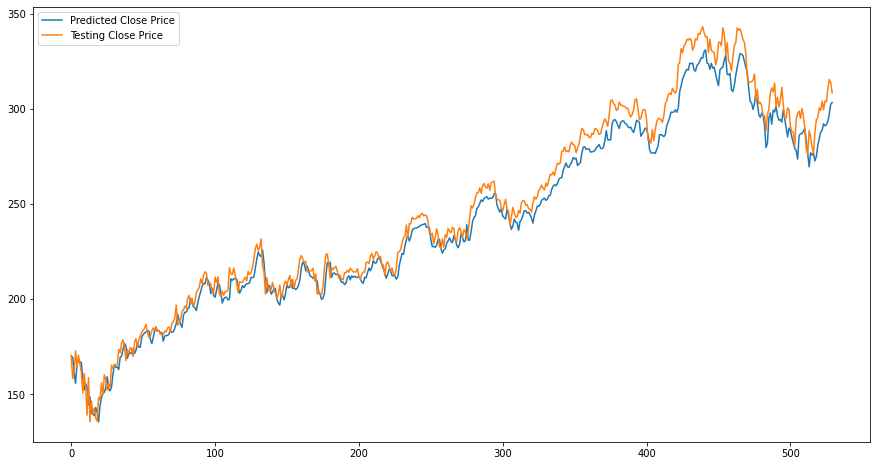

In [27]:
# plotting
plt.figure(figsize=(15,8))

plt.plot(predictions, label="Predicted Close Price")
plt.plot(y_test, label="Testing Close Price")
plt.legend(loc='best')
plt.show()